## 공공데이터 포탈 사용법
- 데이터를 직접 다운 받는 방식이 아니라
- 사용하고자 하는 API 서비스에 대해 '활용 신청'을 해서 인증키를 받아 REST API 방식으로 원하는 데이터를 얻도록 되어 있음
- 지자체, 각 기관, 정부 연관 기관, 정부 부서 별로 따로 관리를 함 (모든 데이터 마다 활용신청을 하고 사용해야 함)


## 신청한 API를 활용하기 위해서는  인증키 필요
- 보안과 관리를 위해서 인증키 사용
- 인증키와 트래픽 제한 등의 장치가 없다면 
- 서비스를 악용하거나 무제한으로 트래픽을 보내서 시스템을 마비시키는 등의 공격이 가능하기 때문에
- 서비스를 제공하는 곳에서 반드시 인증키를 발급 받아 사용


## 공공데이터포털 : 한국 관광공사 지역기반 cnrwp정보 조회


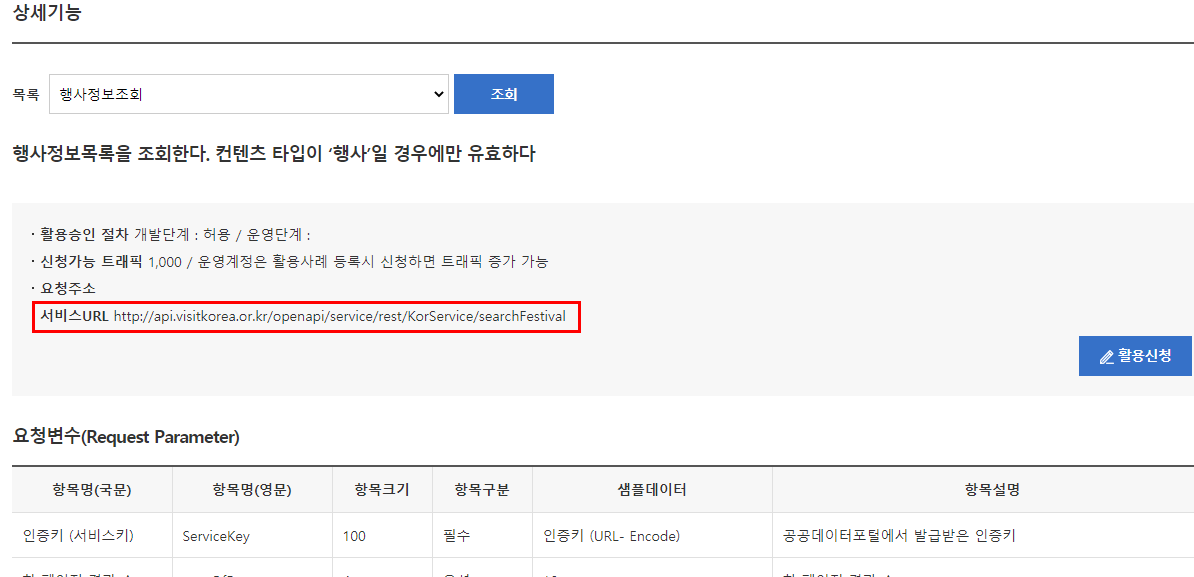

In [25]:
import requests
from bs4 import BeautifulSoup
from urllib.request import urlopen
from urllib.request import Request # 서버 요청 객체를 생성하는 모듈
import pandas as pd

In [4]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [15]:
# url 및 서비스 키
endpoint = 'http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?' ## ? 필요 parameter 구분자 역할
serviceKey = '8aThGqOpV3UcfIzqjBCsfwGq0CGYmB4tk0rVePLWnD42xTtF9hWndhrS11mzgK4VX%2FJ7TdmekVC8wLTvlLk4MA%3D%3D'

In [16]:
numOfRows = "50"
pageNo = "1"
MobileOS = "ETC"
MobileApp = "AppTest"
arrange = "A"
listYN = "Y"
areaCode ="1" # 1 = 서울
sigunguCode ="4"
eventStartDate = "20200101"

In [17]:
# & : 구분자 역할

paramset = "serviceKey=" + serviceKey +"&" \
            + "numOfRows=" + numOfRows +"&" \
            + "pageNo=" + pageNo +"&"  \
            + "MobileOS=" + MobileOS +"&"  \
            + "MobileApp=" + MobileApp + "&" \
            + "arrange="+ arrange + "&" \
            + "areaCode=" + areaCode + "&"\
            + "listYN=" + listYN + "&"  \
            + "eventStartDate=" + eventStartDate

In [18]:
paramset

'serviceKey=8aThGqOpV3UcfIzqjBCsfwGq0CGYmB4tk0rVePLWnD42xTtF9hWndhrS11mzgK4VX%2FJ7TdmekVC8wLTvlLk4MA%3D%3D&numOfRows=50&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&areaCode=1&listYN=Y&eventStartDate=20200101'

In [19]:
url = endpoint + paramset
url

'http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?serviceKey=8aThGqOpV3UcfIzqjBCsfwGq0CGYmB4tk0rVePLWnD42xTtF9hWndhrS11mzgK4VX%2FJ7TdmekVC8wLTvlLk4MA%3D%3D&numOfRows=50&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&areaCode=1&listYN=Y&eventStartDate=20200101'

In [27]:
result = requests.get(url) # api 서비스 호출 (result : 응답객체)
bs_obj= BeautifulSoup(result.content, 'html.parser') #(응답객체인 result를 content or text롤 가져온 이후 parser기를 통해 진행)

In [28]:
bs_obj

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>0000</resultcode><resultmsg>OK</resultmsg></header><body><items><item><addr1>온라인개최</addr1><areacode>1</areacode><cat1>A02</cat1><cat2>A0207</cat2><cat3>A02070200</cat3><contentid>2676393</contentid><contenttypeid>15</contenttypeid><createdtime>20201014165040</createdtime><eventenddate>20201017</eventenddate><eventstartdate>20201017</eventstartdate><firstimage>http://tong.visitkorea.or.kr/cms/resource/92/2676392_image2_1.jpg</firstimage><firstimage2>http://tong.visitkorea.or.kr/cms/resource/92/2676392_image2_1.jpg</firstimage2><modifiedtime>20201014165040</modifiedtime><readcount>0</readcount><sigungucode>2</sigungucode><title>강동구 청소년 민주주의 축제 "놀면 뭐하니? 한 번 더 민주!" 2020</title></item><item><addr1>온라인개최</addr1><addr2>(상일동)</addr2><areacode>1</areacode><cat1>A02</cat1><cat2>A0207</cat2><cat3>A02070200</cat3><contentid>1806376</contentid><contenttypeid>15</contenttypeid><createdtime>20130422102127</createdtim

## 원하는 값 출력
- https://www.data.go.kr/tcs/dss/selectApiDataDetailView.do?publicDataPk=15057787
- 원하는 항목에 해당하는 파라미터 확인
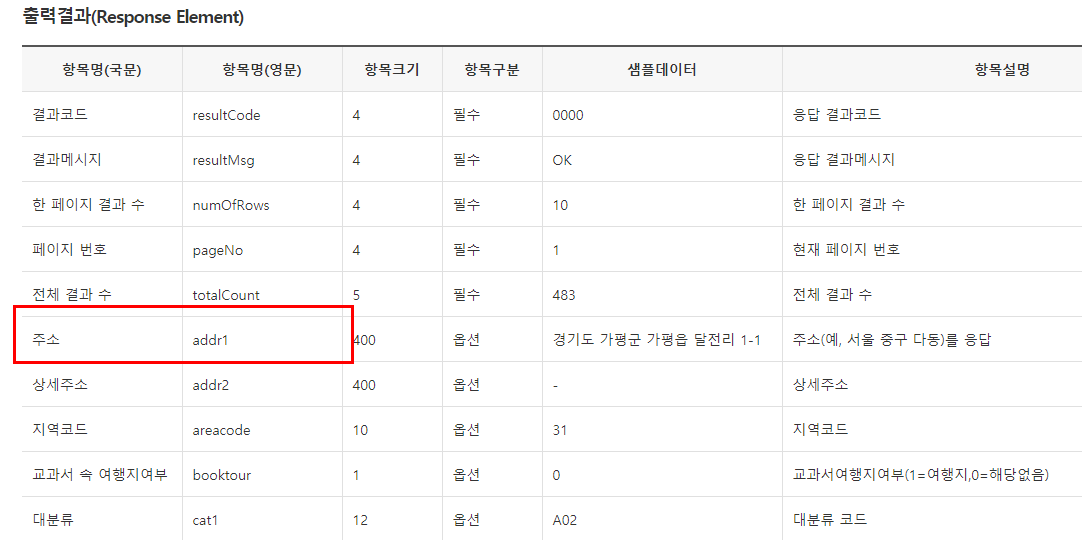

In [35]:
bs_obj.findAll('addr1')
bs_obj.findAll('title')
bs_obj.findAll('tel')

[<addr1>온라인개최</addr1>,
 <addr1>온라인개최</addr1>,
 <addr1>온라인개최</addr1>,
 <addr1>서울특별시 종로구 인왕산로 22</addr1>,
 <addr1>온라인개최</addr1>,
 <addr1>서울특별시 종로구 사직로 161</addr1>,
 <addr1>서울특별시 종로구 사직로 161 경복궁</addr1>,
 <addr1>서울특별시 종로구 사직로 161</addr1>,
 <addr1>서울특별시 종로구 사직로 161</addr1>,
 <addr1>서울특별시 종로구 창경궁로 185</addr1>,
 <addr1>온라인개최</addr1>,
 <addr1>온라인개최</addr1>,
 <addr1>서울특별시 관악구</addr1>,
 <addr1>서울특별시 구로구 가마산로 245</addr1>,
 <addr1>온라인개최</addr1>,
 <addr1>서울특별시 종로구 삼청로 37</addr1>,
 <addr1>서울특별시 종로구 삼청로 37</addr1>,
 <addr1>서울특별시 강남구 영동대로 513</addr1>,
 <addr1>서울특별시 서초구 강남대로 27</addr1>,
 <addr1>서울특별시 종로구 사직로 161</addr1>,
 <addr1>서울특별시 종로구 사직로 161</addr1>,
 <addr1>서울특별시 중구 명동길 26</addr1>,
 <addr1>온라인개최</addr1>,
 <addr1>서울특별시 성동구 왕십리로 63</addr1>,
 <addr1>서울특별시 종로구 대학로12길 64</addr1>,
 <addr1>서울특별시 종로구 대학로8길 1</addr1>,
 <addr1>서울특별시 서초구 강남대로 27 AT Center 제 2전시장</addr1>,
 <addr1>서울특별시 강남구 영동대로 513</addr1>,
 <addr1>온라인개최</addr1>,
 <addr1>서울특별시 서초구 남부순환로 2364</addr1>,
 <addr1>서울특별시 송파구 백제고분로 270</addr1>,
 <a

[<title>강동구 청소년 민주주의 축제 "놀면 뭐하니? 한 번 더 민주!" 2020</title>,
 <title>강동북페스티벌2020</title>,
 <title>강동선사문화축제 2020</title>,
 <title>개천절 대제전 2020</title>,
 <title>건강서울페스티벌 2020</title>,
 <title>경복궁 별빛야행</title>,
 <title>경복궁 생과방</title>,
 <title>경복궁 시식공감</title>,
 <title>경복궁 야간 특별관람</title>,
 <title>고궁음악회「고궁의 숲, 무용을 만나다」</title>,
 <title>공연관광 온라인 쇼케이스 &lt; K-Performance On Air &gt; 2020</title>,
 <title>관광산업 일자리박람회 2020</title>,
 <title>관악강감찬축제</title>,
 <title>구로G페스티벌 2020</title>,
 <title>구로청소년축제 2021</title>,
 <title>국립민속박물관 우리민속한마당 2021</title>,
 <title>국립민속박물관 정월대보름 한마당 2021</title>,
 <title>국제차문화대전</title>,
 <title>궁궐활용 온라인 프로젝트 '궁온' 2020</title>,
 <title>궁디팡팡 캣페스타</title>,
 <title>궁에서 즐기는 슬기로운 가을나기 2020</title>,
 <title>궁중문화축전</title>,
 <title>난타 (명동)</title>,
 <title>남산골 세시절기 축제 정월대보름 2021</title>,
 <title>노 모어 플라스틱(2021 NO MORE PLASTIC)</title>,
 <title>늘근도둑 이야기</title>,
 <title>대학로 거리공연축제</title>,
 <title>대한민국 국제요리&amp;제과경연대회</title>,
 <title>대한민국 목재산업 박람회(WOOD FAIR 2021)</title>,
 <

[<tel>강일 427-4004, 성내 471-0044, 해공 478-9656, 암사 429-0476, 천호 488-7223</tel>,
 <tel>02-3425-5245</tel>,
 <tel>02-736-6375</tel>,
 <tel>070-7575-2351~2</tel>,
 <tel>02-3210-4806</tel>,
 <tel>02-3210-4807, 02-3210-3506</tel>,
 <tel>02-3210-4806</tel>,
 <tel>02-3700-3900~1</tel>,
 <tel>02-2270-1132</tel>,
 <tel>070-4367-0559</tel>,
 <tel>02-2486-9295~6</tel>,
 <tel>02) 828-5763</tel>,
 <tel>02-860-2282</tel>,
 <tel>02-860-2140</tel>,
 <tel>02-3704-3114</tel>,
 <tel>02-3704-3142, 3127</tel>,
 <tel>02-6000-8000</tel>,
 <tel>02-3210-4806~7</tel>,
 <tel>070-8866-6668</tel>,
 <tel>02-3210-4806,4807,3506</tel>,
 <tel>02-3210-4684</tel>,
 <tel>02-739-8288</tel>,
 <tel>02-2261-0517</tel>,
 <tel>010-4667-0417</tel>,
 <tel>02-3672-0900</tel>,
 <tel>02-741-4188</tel>,
 <tel>02-802-7666, 7669</tel>,
 <tel>02-6404-0166</tel>,
 <tel>042-712-9231</tel>,
 <tel>02-580-3274</tel>,
 <tel>070-7938-5480</tel>,
 <tel>02-744-8066</tel>,
 <tel>02-511-1540</tel>,
 <tel>070-7575-2351</tel>,
 <tel>다산콜센터 02-120</tel>

In [36]:
len(bs_obj.findAll('addr1')), len(bs_obj.findAll('title')), len(bs_obj.findAll('tel'))

(49, 50, 49)

http://api.visitkorea.or.kr/openapi/service/rest/KorService/searchFestival?serviceKey=8aThGqOpV3UcfIzqjBCsfwGq0CGYmB4tk0rVePLWnD42xTtF9hWndhrS11mzgK4VX%2FJ7TdmekVC8wLTvlLk4MA%3D%3D&numOfRows=50&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&areaCode=1&listYN=Y&eventStartDate=20200101

In [40]:
items = bs_obj.findAll('item')

for item in items:
    print(item.find('title').text, end=', ')
    print(item.find('addr1').text, end=', ')
    print(item.find('tel')) # 'NoneType' object has no attribute 'text' (텍스트라는 속성이 없다는 얘기) - 예외 처리가 필요

강동구 청소년 민주주의 축제 "놀면 뭐하니? 한 번 더 민주!" 2020, 온라인개최, None
강동북페스티벌2020, 온라인개최, <tel>강일 427-4004, 성내 471-0044, 해공 478-9656, 암사 429-0476, 천호 488-7223</tel>
강동선사문화축제 2020, 온라인개최, <tel>02-3425-5245</tel>
개천절 대제전 2020, 서울특별시 종로구 인왕산로 22, <tel>02-736-6375</tel>
건강서울페스티벌 2020, 온라인개최, <tel>070-7575-2351~2</tel>
경복궁 별빛야행, 서울특별시 종로구 사직로 161, <tel>02-3210-4806</tel>
경복궁 생과방, 서울특별시 종로구 사직로 161 경복궁, <tel>02-3210-4807, 02-3210-3506</tel>
경복궁 시식공감, 서울특별시 종로구 사직로 161, <tel>02-3210-4806</tel>
경복궁 야간 특별관람, 서울특별시 종로구 사직로 161, <tel>02-3700-3900~1</tel>
고궁음악회「고궁의 숲, 무용을 만나다」, 서울특별시 종로구 창경궁로 185, <tel>02-2270-1132</tel>
공연관광 온라인 쇼케이스 < K-Performance On Air > 2020, 온라인개최, <tel>070-4367-0559</tel>
관광산업 일자리박람회 2020, 온라인개최, <tel>02-2486-9295~6</tel>
관악강감찬축제, 서울특별시 관악구, <tel>02) 828-5763</tel>
구로G페스티벌 2020, 서울특별시 구로구 가마산로 245, <tel>02-860-2282</tel>
구로청소년축제 2021, 온라인개최, <tel>02-860-2140</tel>
국립민속박물관 우리민속한마당 2021, 서울특별시 종로구 삼청로 37, <tel>02-3704-3114</tel>
국립민속박물관 정월대보름 한마당 2021, 서울특별시 종로구 삼청로 37, <tel>02-3704-3142, 3

AttributeError: 'NoneType' object has no attribute 'text'

In [41]:
items = bs_obj.findAll('item')

for item in items:
    try:
        print(item.find('title').text, end=', ')
        print(item.find('addr1').text, end=', ')
        print(item.find('tel').text) # 'NoneType' object has no attribute 'text' (텍스트라는 속성이 없다는 얘기) - 예외 처리가 필요
    except :
        print('No data')


강동구 청소년 민주주의 축제 "놀면 뭐하니? 한 번 더 민주!" 2020, 온라인개최, No data
강동북페스티벌2020, 온라인개최, 강일 427-4004, 성내 471-0044, 해공 478-9656, 암사 429-0476, 천호 488-7223
강동선사문화축제 2020, 온라인개최, 02-3425-5245
개천절 대제전 2020, 서울특별시 종로구 인왕산로 22, 02-736-6375
건강서울페스티벌 2020, 온라인개최, 070-7575-2351~2
경복궁 별빛야행, 서울특별시 종로구 사직로 161, 02-3210-4806
경복궁 생과방, 서울특별시 종로구 사직로 161 경복궁, 02-3210-4807, 02-3210-3506
경복궁 시식공감, 서울특별시 종로구 사직로 161, 02-3210-4806
경복궁 야간 특별관람, 서울특별시 종로구 사직로 161, 02-3700-3900~1
고궁음악회「고궁의 숲, 무용을 만나다」, 서울특별시 종로구 창경궁로 185, 02-2270-1132
공연관광 온라인 쇼케이스 < K-Performance On Air > 2020, 온라인개최, 070-4367-0559
관광산업 일자리박람회 2020, 온라인개최, 02-2486-9295~6
관악강감찬축제, 서울특별시 관악구, 02) 828-5763
구로G페스티벌 2020, 서울특별시 구로구 가마산로 245, 02-860-2282
구로청소년축제 2021, 온라인개최, 02-860-2140
국립민속박물관 우리민속한마당 2021, 서울특별시 종로구 삼청로 37, 02-3704-3114
국립민속박물관 정월대보름 한마당 2021, 서울특별시 종로구 삼청로 37, 02-3704-3142, 3127
국제차문화대전, 서울특별시 강남구 영동대로 513, 02-6000-8000
궁궐활용 온라인 프로젝트 '궁온' 2020, No data
궁디팡팡 캣페스타, 서울특별시 서초구 강남대로 27, 070-8866-6668
궁에서 즐기는 슬기로운 가을나기 2020, 서울특별시 종로구 사직로 161, 0

## 제주도 숙박시설 

In [42]:
endpoint='http://api.visitkorea.or.kr/openapi/service/rest/KorService/areaBasedList?'
serviceKey = '8aThGqOpV3UcfIzqjBCsfwGq0CGYmB4tk0rVePLWnD42xTtF9hWndhrS11mzgK4VX%2FJ7TdmekVC8wLTvlLk4MA%3D%3D'

In [43]:
#  paramset  구성
numOfRows = "225"
pageNo = "1"
MobileOS = "ETC"
MobileApp = "AppTest"
arrange = "A"
listYN = "Y"
areaCode ="39"
sigunguCode ="4"
# contentTypeId = "15" #32 번 숙박코드
# 필요에 따라 번호 코드를 변경해서 원하는 정보를 가지고 올 수 있음
contentTypeId = "32"


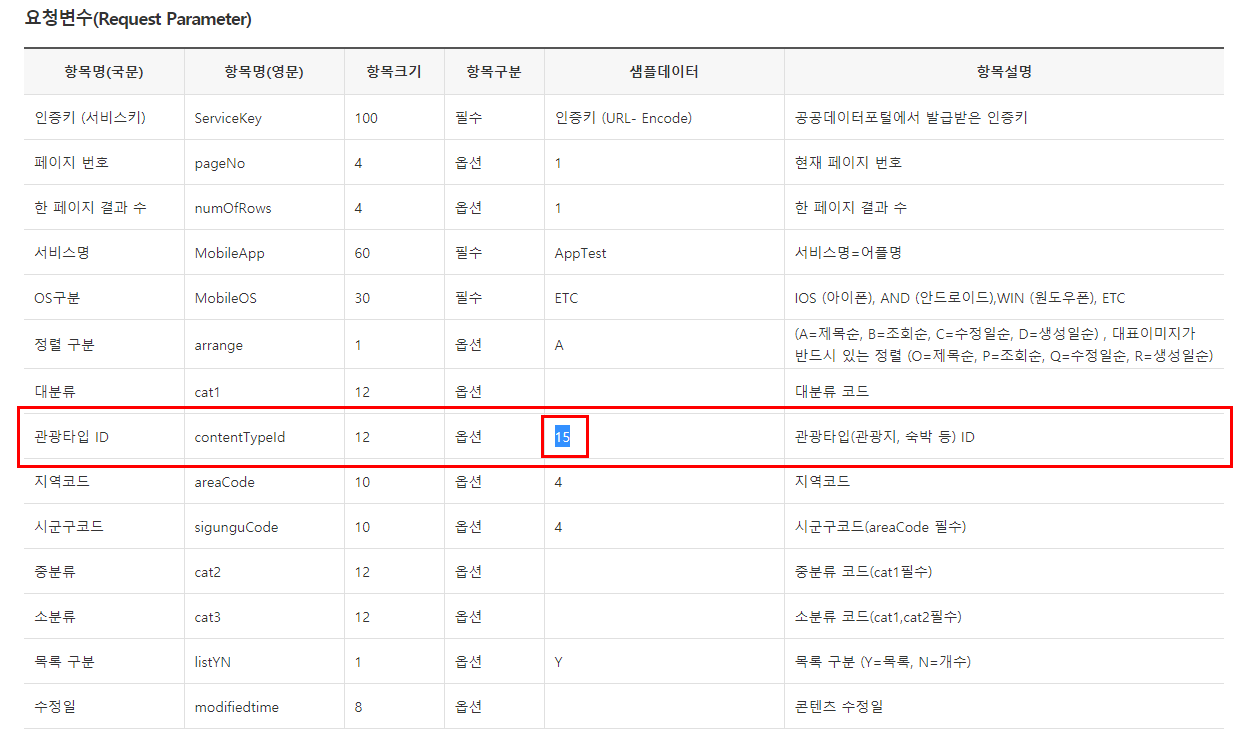

In [44]:
paramset = "serviceKey=" + serviceKey +"&" \
            + "numOfRows=" + numOfRows +"&" \
            + "pageNo=" + pageNo +"&"  \
            + "MobileOS=" + MobileOS +"&"  \
            + "MobileApp=" + MobileApp + "&" \
            + "arrange="+ arrange + "&" \
            + "areaCode=" + areaCode + "&"\
            + "listYN=" + listYN + "&"  \
            + "contentTypeId=" + contentTypeId


In [45]:
# url 확인

url = endpoint + paramset
url

'http://api.visitkorea.or.kr/openapi/service/rest/KorService/areaBasedList?serviceKey=8aThGqOpV3UcfIzqjBCsfwGq0CGYmB4tk0rVePLWnD42xTtF9hWndhrS11mzgK4VX%2FJ7TdmekVC8wLTvlLk4MA%3D%3D&numOfRows=225&pageNo=1&MobileOS=ETC&MobileApp=AppTest&arrange=A&areaCode=39&listYN=Y&contentTypeId=32'

In [47]:
result = requests.get(url)
bs_obj = BeautifulSoup(result.content, 'html.parser')

In [48]:
bs_obj

<?xml version="1.0" encoding="UTF-8" standalone="yes"?><response><header><resultcode>0000</resultcode><resultmsg>OK</resultmsg></header><body><items><item><addr1>제주특별자치도 서귀포시 법환하로9번길 10</addr1><addr2>(법환동)</addr2><areacode>39</areacode><cat1>B02</cat1><cat2>B0201</cat2><cat3>B02010700</cat3><contentid>1896032</contentid><contenttypeid>32</contenttypeid><createdtime>20140218153733</createdtime><mapx>126.5123383804</mapx><mapy>33.2365870334</mapy><mlevel>6</mlevel><modifiedtime>20200907174539</modifiedtime><readcount>6701</readcount><sigungucode>3</sigungucode><tel>064-739-4499</tel><title>가름게스트하우스</title><zipcode>63573</zipcode></item><item><addr1>제주특별자치도 서귀포시 성산읍 일주동로 5464</addr1><areacode>39</areacode><cat1>B02</cat1><cat2>B0201</cat2><cat3>B02010700</cat3><contentid>1832696</contentid><contenttypeid>32</contenttypeid><createdtime>20130801094737</createdtime><mapx>126.8578558136</mapx><mapy>33.3531185797</mapy><mlevel>6</mlevel><modifiedtime>20200911104013</modifiedtime><readcount>583

In [51]:
items = bs_obj.findAll('item')
len(items)

220

In [53]:
for item in items :
    try : 
        print(item.find('title').text, end=',')
        print(item.find('addr1').text, end=',')
        print(item.find('tel').text)
    except :
        print(' No data ')


가름게스트하우스, 제주특별자치도 서귀포시 법환하로9번길 10, 064-739-4499
고망난돌민박, 제주특별자치도 서귀포시 성산읍 일주동로 5464, 064-787-1060
고추잠자리, 제주특별자치도 제주시 도령로 190, 064-782-2434<br />010-6283-2434
관음사가는길펜션, 제주특별자치도 제주시 산록북로 819, 064-724-9931
귤익는마을, 제주특별자치도 서귀포시 성산읍 신천서로 11, 064-787-0543
그린사이드, 제주특별자치도 서귀포시 천제연로 51, 064-738-0074
그림리조트, 제주특별자치도 제주시 서해안로 620-1, 064-742-2080
금호리조트 제주, 제주특별자치도 서귀포시 남원읍 태위로 522-12, 064-766-8000
까델아스 리조트, 제주특별자치도 제주시 애월읍 신엄9길 50, 064-799-7996
까사 데 비발디, 제주특별자치도 서귀포시 안덕면 향교로 214,  No data 
꼬뜨도르 호텔, 제주특별자치도 제주시 구좌읍 일주동로 1724, 064-782-0800
꿈꾸는 노마드 [한국관광 품질인증/Korea Quality], 제주특별자치도 서귀포시 선반로 54, 010-4574-4459
끄라비 펜션, 제주특별자치도 서귀포시 토평로148번길 28, 064-733-3399
나.미.송, 제주특별자치도 제주시 애월읍 평화로 2476, 010-8307-0531
나이스호텔, 제주특별자치도 제주시 논세길 96-38,  No data 
나인브릿지콘도, 제주특별자치도 서귀포시 안덕면 광평로 34-156, 064-793-9999
나인스파빌, 제주특별자치도 제주시 애월읍 하광로 518, 064-727-1000
남극노인성(남극노인성 전통한옥 휴양펜션), 제주특별자치도 서귀포시 하신상로 216, 064-733-8869
노을담은뜨락, 제주특별자치도 서귀포시 대정읍 노을해안로 416, 010-5258-4993
노인과바다 펜션, 제주특별자치도 서귀포시 남원읍 남태해안로 11-12, 064-764-9966
뉴아일랜드 관광

## 연습문제

In [ ]:
## 위에서 추출한 데이터를 df로 저장

In [ ]:
## 특정 지역을 선택해서 관광정보에서 제공하는 데이터를 수집